In [1]:
%matplotlib inline

In [31]:
import pandas as pd
import seaborn as sb
from sqlalchemy import create_engine
conn = create_engine('sqlite:////Users/brett/Desktop/bob/stats.sqlite')

In [37]:
q = pd.read_sql_table('stats', conn)
q.tail()

,treatment_id,replicate_id,generation,kind,value
913,2,3,490,mean,0
914,2,3,490,med,0
915,2,3,500,best,1
916,2,3,500,mean,0
917,2,3,500,med,0


In [38]:
q.set_index(['treatment_id', 'replicate_id', 'generation','kind'], inplace=True)

In [39]:
q.tail()

value
treatment_id replicate_id generation kind       
2            3            490        mean      0
                                     med       0
                          500        best      1
                                     mean      0
                                     med       0

In [40]:
q.unstack(-1)

value                    
kind                                  best      mean       med
treatment_id replicate_id generation                          
1            1            0              1  0.031659  0.031659
                          10             1  0.009338  0.009338
                          20             1  0.000000  0.000000
                          30             1  0.000000  0.000000
                          40             1  0.000000  0.000000
                          50             1  0.000000  0.000000
                          60             1  0.000000  0.000000
                          70             1  0.000000  0.000000
                          80             1  0.000000  0.000000
                          90             1  0.000000  0.000000
                          100            1  0.000000  0.000000
                          110            1  0.000000  0.000000
                          120            1  0.000000  0.000000
                          130            1  0.000000  0.000000
                          140            1  0.000000  0.000000
                          150            1  0.000000  0.000000
                          160            1  0.000000  0.000000
                          170            1  0.000000  0.000000
                          180            1  0.000000  0.000000
                          190            1  0.000000  0.000000
                          200            1  0.000000  0.000000
                          210            1  0.000000  0.000000
                          220            1  0.000000  0.000000
                          230            1  0.000000  0.000000
                          240            1  0.000000  0.000000
                          250            1  0.000000  0.000000
                          260            1  0.000000  0.000000
                          270            1  0.000000  0.000000
                          280            1  0.000000  0.000000
                          290            1  0.000000  0.000000
...                                    ...       ...       ...
2            3            210            1  0.000000  0.000000
                          220            1  0.000000  0.000000
                          230            1  0.000000  0.000000
                          240            1  0.000000  0.000000
                          250            1  0.000000  0.000000
                          260            1  0.000000  0.000000
                          270            1  0.000000  0.000000
                          280            1  0.000000  0.000000
                          290            1  0.000000  0.000000
                          300            1  0.000000  0.000000
                          310            1  0.000000  0.000000
                          320            1  0.000000  0.000000
                          330            1  0.000000  0.000000
                          340            1  0.000000  0.000000
                          350            1  0.000000  0.000000
                          360            1  0.000000  0.000000
                          370            1  0.000000  0.000000
                          380            1  0.000000  0.000000
                          390            1  0.000000  0.000000
                          400            1  0.000000  0.000000
                          410            1  0.000000  0.000000
                          420            1  0.000000  0.000000
                          430            1  0.000000  0.000000
                          440            1  0.000000  0.000000
                          450            1  0.000000  0.000000
                          460            1  0.000000  0.000000
                          470            1  0.000000  0.000000
                          480            1  0.000000  0.000000
                          490            1  0.000000  0.000000
                          500            1  0.000000  0.000000

[306

In [76]:
z = pd.read_sql_query('select generation, kind, value from stats where treatment_id = 1 and replicate_id = 1', conn, index_col=['generation', 'kind'])
z.tail()

value
generation kind         
9975       FitVar      0
10000      C1          0
           C2          0
           FitAve      1
           FitVar      0

In [77]:
zz = z.unstack(-1)
zz.tail()

value                     
kind          C1 C2  FitAve    FitVar
generation                           
9900           0  0  0.9975  0.000619
9925           0  0  1.0000  0.000000
9950           0  0  1.0000  0.000000
9975           0  0  1.0000  0.000000
10000          0  0  1.0000  0.000000

In [78]:
zz.columns = zz.columns.levels[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10bdb1ad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10c390c90>], dtype=object)

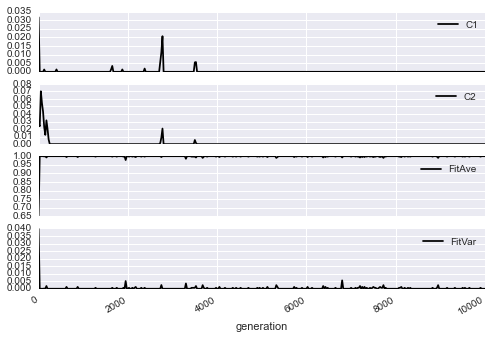

In [79]:
zz.plot(subplots=True)